In [20]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
from tqdm import tqdm
%pylab inline

import numpy as np

def solve(f, Xs, Y0, with_h = 1., max_iter = 1e5):
    X0, XF = Xs
    r = ode(f)
    r.set_integrator('dopri5')
    r.set_initial_value(Y0, X0)

    dt = with_h
    Xs = []
    Ys = []

    length = min((XF - X0)/dt, max_iter)
    for i in tqdm(range(int(length))):
        if not r.successful():
            break

        r.integrate(r.t + dt)
        Xs.append(r.t)
        Ys.append(r.y)
    return Xs, Ys

sigma = 10.
r = 99.96
b = 8/3
def f(t, Y):
    x, y, z = Y
    ẋ = sigma * (y - x)
    ẏ = -x*z + r*x - y
    ż = x*y - b*z
    return [ẋ, ẏ, ż]

`%matplotlib` prevents importing * from pylab and numpy
 29%|██▉       | 2934/10000 [00:00<00:00, 13606.88it/s]

Populating the interactive namespace from numpy and matplotlib


100%|██████████| 10000/10000 [00:00<00:00, 16417.13it/s]


In [30]:
def anim(Ys, fps = 10, d=5):
    import matplotlib.pyplot as plt
    from matplotlib import animation
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np

    from embed_gif import from_anim
    
    N_trajectories = len(Ys)

    # Set up figure & 3D axis for animation
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

    # set up lines and points
    lines = [item
                 for c in colors for item in ax.plot([], [], [], '-', c=c)]
    pts = [item
               for c in colors for item in ax.plot([], [], [], 'o', c=c)]

    off = 100
    # prepare the axes limits
    #ax.set_xlim((-100, 100))
    #ax.set_ylim((-100, 100))
    #ax.set_zlim((5, 55))

    # set point-of-view: specified by (altitude degrees, azimuth degrees)
    ax.view_init(30, 0)

    # initialization function: plot the background of each frame
    def init():
        for line, pt in zip(lines, pts):
            line.set_data([], [])
            line.set_3d_properties([])

            pt.set_data([], [])
            pt.set_3d_properties([])
        return lines + pts

    # animation function.  This will be called sequentially with the frame number
    def animate(i):
        for line, pt, xi in zip(lines, pts, Ys):
            x, y, z = xi[:(i+1)].T / 200.
            line.set_data(x, y)
            line.set_3d_properties(z)

            pt.set_data(x[-1:], y[-1:])
            pt.set_3d_properties(z[-1:])

        #ax.view_init(30, 0.3 * i)
        fig.canvas.draw()
        return lines + pts


    anim = animation.FuncAnimation(fig, animate, 
                                   init_func=init, frames=d, blit=True)
    return from_anim(anim)

In [31]:
Xs = (0, 100)
Y0s = [
        [0, 0.5, 1],
        [0, 0.6, 1.1],
        [0, 0.7, 1.2]
    ]

Y0s = -15 + 30 * np.random.random((4, 3))

def solve_lorenz(Y0):
    X_d, Y_d = solve(f, Xs, Y0, with_h = 1e-2)
    return np.array(Y_d)

Ys = list(map(solve_lorenz, Y0s))

100%|██████████| 10000/10000 [00:00<00:00, 15305.12it/s]


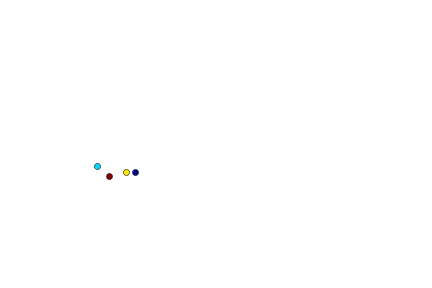

In [32]:
anim(Ys, d = 300, fps = 1)